Imports

In [334]:

import pandas as pd
import numpy as np
from surprise import Dataset
from surprise import Reader
import warnings
from surprise import KNNWithMeans
from surprise import SVD
warnings.filterwarnings("ignore")


Load data

In [246]:
df = pd.read_excel("ratings_movies.xlsx", header=None)

Preprocessing data 


In [377]:
all_user_df = pd.DataFrame()

dfg  = df.reset_index().groupby("index")
for name, group in dfg:
    del group["index"]
    rating = group.to_numpy().reshape(-1,1)
    film_id = group.columns.to_numpy().reshape(-1,1)
    #print(film_id)
    rating_df = pd.DataFrame( rating , columns = ["rating"]).reset_index()
    film_id_df = pd.DataFrame(film_id, columns = ['film_id']).reset_index()
    df_for_user = rating_df.merge(film_id_df, on="index")
    df_for_user["index"] = df_for_user["index"].apply(lambda x: name)
    all_user_df = all_user_df.append(df_for_user)

In [378]:
all_user_df

,index,rating,film_id
0,0,5,0
1,0,5,1
2,0,5,2
3,0,1,3
4,0,1,4
...,...,...,...
10,14,1,10
11,14,1,11
12,14,1,12
13,14,1,13


In [379]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

Add new user and swtiching columns(for creating dataset)

In [386]:
new_user = [ [15, 2 ,3],
            [15, 5, 2],
            [15, 2,1],
            [15,1,6]]
all_user_df = all_user_df.append(pd.DataFrame(new_user, columns=["index","rating","film_id"]))
all_user_df = df_column_switch(all_user_df, "film_id","index")
all_user_df = df_column_switch(all_user_df, "index", "rating")
all_user_df

,film_id,index,rating
0,0,0,5
1,1,0,5
2,2,0,5
3,3,0,1
4,4,0,1
...,...,...,...
3,6,15,1
0,3,15,2
1,2,15,5
2,1,15,2


Creating dataset

In [387]:
reader = Reader(rating_scale=(1,5))
dataset = Dataset.load_from_df(all_user_df, reader=reader)

In [388]:
sim_options = {
    "n_epochs": 1000,
      
    
}
algo = SVD(n_epochs=100, lr_all=0.01)

Training

In [389]:
train = dataset.build_full_trainset()
algo.fit(train)

Prediction for user 0 and new user 15

In [393]:
for i in range(1,15):
    prediction = algo.predict(1,i)
    print(prediction.est)

4.9274450074347955
4.937070067107845
3.039775496054583
3.0135377241069077
3.024396746415632
1.037758442805706
1.0615662570981517
1.0489282978843533
3.9106411957242013
3.9097433479777637
3.927150623890438
1.0173453761033657
1
1.0395231998810717


In [394]:
for i in range (1,15):
    prediction = algo.predict(15, i)
    print(prediction.est)

2.6942075015605367
2.6943573474114273
2.8502973148281936
2.823532045683412
2.843053305978295
2.9337079989879036
2.9141865982115642
2.937206388273928
2.9131113177258827
2.9118882449457804
2.9257936260213184
1.3129594036917585
1.3205736420356515
1.335556016791863


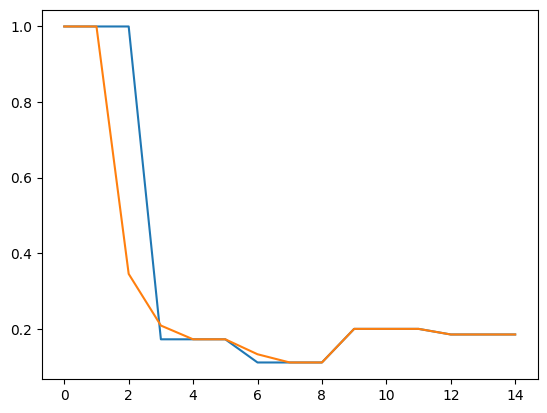

In [417]:
import matplotlib.pyplot as plt

data = algo.compute_similarities()
plt.plot(data[0])
plt.plot(data[1])